In [ ]:
# Evaluate MeanShift clustering on german_credit
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from prettytable import PrettyTable
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from google.colab import files
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.metrics import confusion_matrix



# load data
filename = 'german_credit.csv'
names = ['classification', 'existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount',
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors',
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing',
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,1:22]
Y = array[:,0]
test_size = 0.37
seed = 3
n_splits = 3
seeds = 3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
kfold = KFold(n_splits=n_splits, random_state=seeds)

accuracy = []
x = PrettyTable()
x.field_names = ["Model name", "Accuracy"]

# Logistic Regression
kfold = KFold(n_splits=3, random_state=3)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = 100 * cross_val_score(model, X_test, Y_test, cv=kfold)
# print("LogisticRegression Accuracy =","%.2f" % result.mean())
x.add_row(["LR", "%.2f" % result.mean()])
accuracy += ["%.2f" % result.mean()]

# KNN Classification
kfold = KFold(n_splits=10, random_state=5)
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, Y_train)
result5 = 100 * cross_val_score(model, X_test, Y_test, cv=kfold)
# print("k-Nearest Neighbors Accuracy =","%.2f" % result5.mean(), "%")
a2 = x.add_row(["KNN", "%.2f" % result5.mean()])
accuracy += ["%.2f" % result5.mean()]

# Gaussian Naive Bayes Classification
model = GaussianNB()
model.fit(X_train, Y_train)
result6 = 100 * model.score(X_test, Y_test)
# print("GaussianNB Accuracy =","%.2f" % result6, "%")
a3 = x.add_row(["GNB", "%.2f" % result6.mean()])
accuracy += ["%.2f" % result6.mean()]

# SVM Classification
kfold = KFold(n_splits=5, random_state=3)
model = SVC()
model.fit(X_train, Y_train)
result7 = 100 * cross_val_score(model, X_test, Y_test, cv=kfold)
# print("SVM Accuracy =","%.2f" % result7.mean(), "%")
a4 = x.add_row(["SVM", "%.2f" % result7.mean()])
accuracy += ["%.2f" % result7.mean()]

# Random Forest Classification
kfold = KFold(n_splits=5, random_state=3)
model = RandomForestClassifier(n_estimators=50, max_features=10)
model.fit(X_train, Y_train)
result8 = 100 * cross_val_score(model, X_test, Y_test, cv=kfold)
# print("Random Forest Accuracy =","%.2f" % result8.mean(), "%")
a5 = x.add_row(["RF", "%.2f" % result8.mean()])
accuracy += ["%.2f" % result8.mean()]

# Stochastic Gradient Boosting Classification
model = GradientBoostingClassifier(n_estimators=100, random_state=7)
model.fit(X_train, Y_train)
result9 = 100 * model.score(X_test, Y_test)
# print("Gradient Boosting Accuracy =","%.2f" % result9, "%")
a6 = x.add_row(["GB", "%.2f" % result9.mean()])
accuracy += ["%.2f" % result9.mean()]

# Decision Tree Classification
kfold = KFold(n_splits=10, random_state=3)
model = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=3)
model.fit(X_train, Y_train)
result10 = 100 * cross_val_score(model, X_test, Y_test, cv=kfold)
# print("Decision Tree Accuracy =","%.2f" % result10.mean(), "%")
a7 = x.add_row(["DT", "%.2f" % result10.mean()])
accuracy += ["%.2f" % result10.mean()]

# AdaBoost Classification
kfold = KFold(n_splits=3, random_state=3)
model = AdaBoostClassifier(n_estimators=30, random_state=7)
model.fit(X_train, Y_train)
result11 = 100 * cross_val_score(model, X_test, Y_test, cv=kfold)
# print("AdaBoost Accuracy =","%.2f" % result11.mean(), "%")
a8 = x.add_row(["AdB", "%.2f" % result11.mean()])
accuracy += ["%.2f" % result11.mean()]

# Bagged Decision Trees for Classification
model = BaggingClassifier(n_estimators=30, random_state=7)
model.fit(X_train, Y_train)
result12 = 100 * model.score(X_test, Y_test)
# print("Bagging DT Accuracy =","%.2f" % result12, "%")
a9 = x.add_row(["BDT", "%.2f" % result12.mean()])
accuracy += ["%.2f" % result12.mean()]

# Quadratic Discriminant Analysis for Classification
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, Y_train)
result13 = 100 * model.score(X_test, Y_test)
# print("QDA Accuracy =","%.2f" % result13, "%")
a10 = x.add_row(["QDA", "%.2f" % result13.mean()])
accuracy += ["%.2f" % result13.mean()]

# Linear Discriminant Analysis for Classification
kfold = KFold(n_splits=5, random_state=3)
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
result14 = 100 * cross_val_score(model, X_test, Y_test, cv=kfold)
# print("LDA Accuracy =","%.2f" % result14.mean(), "%")
a11 = x.add_row(["LDA", "%.2f" % result14.mean()])
accuracy += ["%.2f" % result14.mean()]

# Extra Trees Classifier
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
result15 = 100 * model.score(X_test, Y_test)
# print("ExtraTrees Accuracy =","%.2f" % result15, "%")
a12 = x.add_row(["ExT", "%.2f" % result15.mean()])
accuracy += ["%.2f" % result15.mean()]

# BernoulliNB Classifier
kfold = KFold(n_splits=10, random_state=3)
model = BernoulliNB()
model.fit(X_train, Y_train)
result16 = 100 * cross_val_score(model, X_test, Y_test, cv=kfold)
# print("BernoulliNB Accuracy =","%.2f" % result16.mean(), "%")
a13 = x.add_row(["BNB", "%.2f" % result16.mean()])
accuracy += ["%.2f" % result16.mean()]

# Mean Shift
#thresholder = VarianceThreshold(threshold=.1)
#X_train1 = thresholder.fit_transform(X_train)
#X_train1=SelectKBest(score_func=chi2,k=5).fit_transform(X_train,Y_train)
estimate_bandwidth = estimate_bandwidth(X_train)
bandwidth = 2500
ms = MeanShift(bandwidth=bandwidth).fit(X_train)
labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of clusters =", n_clusters_)
# print("labels =", labels_unique)
# print("estimate_bandwidth =", estimate_bandwidth)
# print("bandwidth =", bandwidth)

# Mean Shift on training data
kfold = KFold(n_splits=20, random_state=3)
# X_test_labeled = ms.fit_predict(X_test)
# print(X_test_labeled)
X_test_labeled = cross_val_predict(ms, X_test, Y_test, cv=kfold)
# Y_train
# X_train_labeled
print(len(X_test_labeled))
# print(len(Y_train))
L = len(Y_test)
result1 = 0
result2 = 0
result3 = 0
result4 = 0

for i in range(len(Y_test)):
  if X_test_labeled[i] == 0:
    result1 += 1
    if Y_test[i] == 1:
      result2 += 1
  if X_test_labeled[i] == 1:
    result3 += 1
    if Y_test[i] == 0:
      result4 += 1

# acc = result2 * 100 /result1
# acc1 = result4 * 100 /result3
acc2 = (result2+result4) * 100 / (result1+result3)
# acc3 = (result1-result2) * 100 / result4
print(result1)
print(result2)
print(result3)
print(result4)
# print("MeanShift ACC 1 =", acc, "%")
# print("MeanShift ACC 2 =", acc1, "%")
# print("MeanShift Accuracy =","%.2f" % acc2, "%")
a14 = x.add_row(["MS", "%.2f" % acc2])
accuracy += ["%.2f" % acc2]


x.sortby = "Accuracy"
print(x)

# scoring_model = ["LR", "KNN", "GNB", "SVM", "RF", "GB", "DT", "AdB", "BDT", "QDA", "LDA", "ExT", "BNB", "MS"]
# df = pd.DataFrame({"scoring model":scoring_model, "accuracy":accuracy})
# df_sorted_desc= df.sort_values('accuracy')
# df_sorted_desc
# bar plot with matplotlib
# plt.bar(df)
# plt.ylabel("accuracy")
# plt.title("Copmaring Mean Shift (MS) with Machine Learning models")
# barlist[7].set_color('r')
# plt.ylim(0, 100)
# axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
# plt.show()
# plt.savefig("1.png")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

number of clusters = 2


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


370
345
258
25
17
+------------+----------+
| Model name | Accuracy |
+------------+----------+
|    KNN     |  70.27   |
|    QDA     |  73.24   |
|     DT     |  74.05   |
|    SVM     |  74.05   |
|    BNB     |  74.32   |
|     MS     |  74.32   |
|    BDT     |  76.22   |
|     RF     |  76.49   |
|    ExT     |  77.03   |
|    GNB     |  77.03   |
|    AdB     |  77.30   |
|     GB     |  77.84   |
|    LDA     |  78.38   |
|     LR     |  79.19   |
+------------+----------+


In [ ]:
from prettytable import PrettyTable
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from google.colab import files
from matplotlib import pyplot

x = PrettyTable()
x.field_names = ["Model name", "Accuracy"]
x.add_row(["LR", 77.30])
x.add_row(["KNN", 68.11])
x.add_row(["GNB", 77.03])
x.add_row(["SVM", 73.78])
x.add_row(["RF", 75.95])
x.add_row(["GB", 77.84])
x.add_row(["DT", 72.16])
x.add_row(["AdB", 71.89])
x.add_row(["BDT", 76.22])
x.add_row(["QDA", 73.24])
x.add_row(["LDA", 78.65])
x.add_row(["ExT", 78.11])
x.add_row(["BNB", 72.70])
x.add_row(["MS", 74.05])
print("Table sorted by Accuracy:")
x.sortby = "Accuracy"
print(x)

axes= plt.axes()
plt.title("Copmaring Mean Shift (MS) with Machine Learning models")
plt.ylim(0, 100)
axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.ylabel("Accuracy")
barlist=plt.bar(["LR", "LDA", "GB","ExT", "AdB", "GNB", "RF", "BDT", "MS", "BNB", "SVM", "DT", "QDA", "KNN"], [79.19, 78.38, 77.84, 77.57, 77.30, 77.03, 76.22, 76.22, 74.32, 74.32, 74.05, 73.78, 73.24, 70.27])
barlist[8].set_color('r')
plt.show()

In [ ]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from prettytable import PrettyTable
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.feature_selection import VarianceThreshold


# load data
filename = 'german_credit.csv'
names = ['classification', 'existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount',
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors',
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing',
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,1:22]
Y = array[:,0]
test_size = 0.21
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

results = []
names = []
x = PrettyTable()
x.field_names = ["Model name", "Accuracy"]

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=13)))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier(n_estimators=80, max_features=20)))
models.append(('GB', GradientBoostingClassifier(n_estimators=100, random_state=7)))
models.append(('DT', DecisionTreeClassifier(min_samples_split=50, min_samples_leaf=3)))
models.append(('AdB', AdaBoostClassifier(n_estimators=100, random_state=7)))
models.append(('BDT', BaggingClassifier(n_estimators=100, random_state=7)))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('ExT', ExtraTreesClassifier()))
models.append(('BNB', BernoulliNB()))
models.append(('MLP', MLPClassifier(random_state=7)))


# evaluate each model in turn
for name, model in models:
  model.fit(X_train, Y_train)
  cv_results = 100 * model.score(X_test, Y_test)
  results.append(cv_results)
  names.append(name)
  x.add_row([name, "%.2f" % cv_results])


# Mean Shift
thresholder = VarianceThreshold(threshold=.1)
#X_train1 = thresholder.fit_transform(X_train)
#X_train1=SelectKBest(score_func=chi2,k=5).fit_transform(X_train,Y_train)
#estimate_bandwidth = estimate_bandwidth(X_train)
bandwidth = 2300
ms = MeanShift(bandwidth=bandwidth).fit(X_train)
labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
# print("number of clusters =", n_clusters_)
print("labels =", labels_unique)
# print("estimate_bandwidth =", estimate_bandwidth)
# print("bandwidth =", bandwidth)

# Mean Shift on training data
#kfold = KFold(n_splits=20, random_state=3)
X_test_labeled = ms.predict(X_test)
# print(X_test_labeled)
#X_test_labeled = cross_val_predict(ms, X_test, Y_test, cv=kfold)
# Y_train
# X_train_labeled
print(len(X_test_labeled))
# print(len(Y_train))
#L = len(Y_test)
result1 = 0
result2 = 0
result3 = 0
result4 = 0

for i in range(len(Y_test)):
  if X_test_labeled[i] == 0:
    result1 += 1
    if Y_test[i] == 1:
      result2 += 1
  if X_test_labeled[i] == 1:
    result3 += 1
    if Y_test[i] == 0:
      result4 += 1

# acc = result2 * 100 /result1
# acc1 = result4 * 100 /result3
acc2 = (result2+result4) * 100 / (result1+result3)
# acc3 = (result1-result2) * 100 / result4
print("FP =", result1 - result2)
print("TP =", result2)
print("FN =", result3 - result4)
print("TN =", result4)
# print("MeanShift ACC 1 =", acc, "%")
# print("MeanShift ACC 2 =", acc1, "%")
# print("MeanShift Accuracy =","%.2f" % acc2, "%")
a14 = x.add_row(["MS", "%.2f" % acc2])


x.sortby = "Accuracy"
print(x)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


labels = [0 1]
210
FP = 50
TP = 151
FN = 1
TN = 8
+------------+----------+
| Model name | Accuracy |
+------------+----------+
|    KNN     |  71.43   |
|    MLP     |  72.38   |
|    AdB     |  73.33   |
|    BNB     |  74.29   |
|    SVM     |  74.76   |
|     GB     |  75.71   |
|     MS     |  75.71   |
|    QDA     |  75.71   |
|    GNB     |  76.19   |
|    BDT     |  76.67   |
|     DT     |  77.14   |
|     RF     |  77.14   |
|    ExT     |  79.52   |
|     LR     |  79.52   |
|    LDA     |  80.00   |
+------------+----------+


In [ ]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from prettytable import PrettyTable
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.feature_selection import VarianceThreshold


# load data
filename = 'german_credit.csv'
dataframe = read_csv(filename)
array = dataframe.values
array = array[~pd.isnull(array)]
X = array[:,1:14]
Y = array[:,0]
test_size = 0.21
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

results = []
names = []
x = PrettyTable()
x.field_names = ["Model name", "Accuracy"]

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=13)))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier(n_estimators=80, max_features=20)))
models.append(('GB', GradientBoostingClassifier(n_estimators=100, random_state=7)))
models.append(('DT', DecisionTreeClassifier(min_samples_split=50, min_samples_leaf=3)))
models.append(('AdB', AdaBoostClassifier(n_estimators=100, random_state=7)))
models.append(('BDT', BaggingClassifier(n_estimators=100, random_state=7)))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('ExT', ExtraTreesClassifier()))
models.append(('BNB', BernoulliNB()))
models.append(('MLP', MLPClassifier(random_state=7)))


# evaluate each model in turn
for name, model in models:
  model.fit(X_train, Y_train)
  cv_results = 100 * model.score(X_test, Y_test)
  results.append(cv_results)
  names.append(name)
  x.add_row([name, "%.2f" % cv_results])


# Mean Shift
thresholder = VarianceThreshold(threshold=.1)
#X_train1 = thresholder.fit_transform(X_train)
#X_train1=SelectKBest(score_func=chi2,k=5).fit_transform(X_train,Y_train)
#estimate_bandwidth = estimate_bandwidth(X_train)
bandwidth = 2300
ms = MeanShift(bandwidth=bandwidth).fit(X_train)
labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
# print("number of clusters =", n_clusters_)
print("labels =", labels_unique)
# print("estimate_bandwidth =", estimate_bandwidth)
# print("bandwidth =", bandwidth)

# Mean Shift on training data
#kfold = KFold(n_splits=20, random_state=3)
X_test_labeled = ms.predict(X_test)
# print(X_test_labeled)
#X_test_labeled = cross_val_predict(ms, X_test, Y_test, cv=kfold)
# Y_train
# X_train_labeled
print(len(X_test_labeled))
# print(len(Y_train))
#L = len(Y_test)
result1 = 0
result2 = 0
result3 = 0
result4 = 0

for i in range(len(Y_test)):
  if X_test_labeled[i] == 0:
    result1 += 1
    if Y_test[i] == 1:
      result2 += 1
  if X_test_labeled[i] == 1:
    result3 += 1
    if Y_test[i] == 0:
      result4 += 1

# acc = result2 * 100 /result1
# acc1 = result4 * 100 /result3
acc2 = (result2+result4) * 100 / (result1+result3)
# acc3 = (result1-result2) * 100 / result4
print("FP =", result1 - result2)
print("TP =", result2)
print("FN =", result3 - result4)
print("TN =", result4)
# print("MeanShift ACC 1 =", acc, "%")
# print("MeanShift ACC 2 =", acc1, "%")
# print("MeanShift Accuracy =","%.2f" % acc2, "%")
a14 = x.add_row(["MS", "%.2f" % acc2])


x.sortby = "Accuracy"
print(x)
Y_test[0]

IndexError: ignored

In [ ]:
# australian
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kstest
from sklearn.preprocessing import normalize
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split,GridSearchCV, ShuffleSplit, StratifiedShuffleSplit, LeaveOneOut
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from prettytable import PrettyTable
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from prettytable import PrettyTable
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing


results = []
names = []
a = PrettyTable()
a.field_names = ["Model name", "Accuracy"]


# Preprocessing
df=pd.read_table('australian.dat',sep='\s+',header=None)
df.columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','Y']
x=df.drop('Y',axis=1)
y=df['Y']

test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=10)


models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier(n_estimators=80)))
models.append(('GB', GradientBoostingClassifier(n_estimators=100, random_state=7)))
models.append(('DT', DecisionTreeClassifier(min_samples_split=50, min_samples_leaf=3)))
models.append(('AdB', AdaBoostClassifier(n_estimators=100, random_state=7)))
models.append(('BDT', BaggingClassifier(n_estimators=100, random_state=7)))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('ExT', ExtraTreesClassifier()))
models.append(('BNB', BernoulliNB()))
models.append(('MLP', MLPClassifier(random_state=7)))

for name, model in models:
  model.fit(X_train, Y_train)
  cv_results = 100 * model.score(X_test, Y_test)
  results.append(cv_results)
  names.append(name)
  a.add_row([name, "%.2f" % cv_results])


# Mean Shift
#thresholder = VarianceThreshold(threshold=.1)
#X_train1 = thresholder.fit_transform(X_train)
#X_train1=SelectKBest(score_func=chi2,k=5).fit_transform(X_train,Y_train)
bandwidth = 270
#X_train1 = preprocessing.scale(X_train)
estimate_bandwidth = estimate_bandwidth(X_train)
ms = MeanShift(bandwidth= bandwidth).fit(X_train)
labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
# print("number of clusters =", n_clusters_)
print("labels =", labels_unique)
# print("estimate_bandwidth =", estimate_bandwidth)
# print("bandwidth =", bandwidth)

# Mean Shift on training data
#kfold = KFold(n_splits=20, random_state=3)
X_test_labeled = ms.predict(X_test)
# print(X_test_labeled)
#X_test_labeled = cross_val_predict(ms, X_test, Y_test, cv=kfold)
# Y_train
# X_train_labeled
print(len(X_test_labeled))
# print(len(Y_train))
#L = len(Y_test)
result1 = 0
result2 = 0
result3 = 0
result4 = 0

for i in range(len(Y_test)):
  if X_test_labeled[i] > 1:
    X_test_labeled[i] = 1


for i in range(len(Y_test)):
  if X_test_labeled[i] == 1:
    result1 += 1
    if Y_test.iat[i] == 1:
      result2 += 1
  if X_test_labeled[i] == 0:
    result3 += 1
    if Y_test.iat[i] == 0:
      result4 += 1

# acc = result2 * 100 /result1
# acc1 = result4 * 100 /result3
acc2 = (result2+result4) * 100 / (result1+result3)
# acc3 = (result1-result2) * 100 / result4
print("FP =", result1 - result2)
print("TP =", result2)
print("FN =", result3 - result4)
print("TN =", result4)
# print("MeanShift ACC 1 =", acc, "%")
# print("MeanShift ACC 2 =", acc1, "%")
# print("MeanShift Accuracy =","%.2f" % acc2, "%")
a.add_row(["MS", "%.2f" % acc2])




a.sortby = "Accuracy"
print(a)
#for i in range(len(Y_test)):
#  print(Y_test.iat[i], X_test_labeled[i])
print('bandwidth:', bandwidth)
print('estimate_bandwidth:', estimate_bandwidth)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternativ

labels = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
138
FP = 7
TP = 28
FN = 30
TN = 73
+------------+----------+
| Model name | Accuracy |
+------------+----------+
|    SVM     |  68.84   |
|    KNN     |  70.29   |
|     MS     |  73.19   |
|    GNB     |  79.71   |
|    MLP     |  79.71   |
|    BNB     |  85.51   |
|    QDA     |  85.51   |
|    AdB     |  87.68   |
|     GB     |  88.41   |
|    ExT     |  89.13   |
|    LDA     |  89.13   |
|     RF     |  89.13   |
|     DT     |  89.86   |
|    BDT     |  90.58   |
|     LR     |  92.03   |
+------------+----------+
bandwidth: 270
estimate_bandwidth: 1122.623924906554


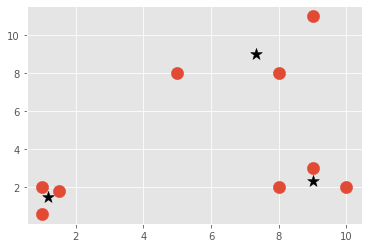

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

##plt.scatter(X[:,0], X[:,1], s=150)
##plt.show()

colors = 10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=4):
        self.radius = radius

    def fit(self, data):
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]

        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break

            if optimized:
                break

        self.centroids = centroids



clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()

In [ ]:
import csv
import pandas as pd
from sklearn import linear_model
import numpy as np


# gini = a * inflation + b * inflation2 + c * growth + d
def calc_regression(start, end, data):
    X = df.iloc[start: end, [1, 3, 4]]
    y = df.iloc[start: end, [2]]
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    a = regr.coef_[0][0]
    b = regr.coef_[0][2]
    c = regr.coef_[0][1]
    d = regr.intercept_[0]
    r2 = regr.score(X, y)
    return a, b, c, d, r2

df = pd.read_csv('mcaro1.csv')

df = df.assign(Inflation2=np.power(df['Gini'], 2))
n = df.shape[0]
coeffs = pd.DataFrame(columns=['Year', 'j', 'a', 'b', 'c', 'd', 'r2'])
co_10 = pd.DataFrame(columns=['Year', 'j', 'a', 'b', 'c', 'd', 'r2'])
for i in range(n - 5):
    max_r2 = 0
    max_a, max_b, max_c, max_d, max_j = 0, 0, 0, 0, 0
    for j in range(i + 5, n):
        a, b, c, d, r2 = calc_regression(i, j, df)
        if r2 >= max_r2:
            max_r2 = r2
            max_a, max_b, max_c, max_d, max_j = a, b, c, d, j
        # print(j)
        if j == i + 30:
            co_10.loc[i] = [df.loc[i]['Year'], j + df.loc[i]['Year'], a, b, c, d, r2]
    coeffs.loc[i] = [df.loc[i]['Year'], max_j + df.loc[i]['Year'], max_a, max_b, max_c, max_d, max_r2]
    # print(coeffs[i])
print(coeffs)
print(co_10)

ValueError: ignored